In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def style_plot(ax: plt.Axes, num_it: int, params: dict) -> plt.Axes:
    """
    Generate style for Learning Rate plots.
    :param ax: Drawing axis
    :param num_it: Number of plotted iterations
    :param params: Parameter dict (see make_plots())
    :return: axis
    """
    #Remove top and right axes
    ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
    ax.legend(fontsize=params['fontSizeLabels'], loc='lower right')
    #Add line at 50%
    ax.hlines(50,0,num_it,color="silver", linestyles="--") 
    

    
    ax.set_xlabel("Trials", fontsize=params['fontSizeLabels'])
    ax.set_ylabel("Accuracy (%)", fontsize=params['fontSizeLabels'])
    ax.set_yticks(np.arange(30,110,10))
    
    ax.tick_params(axis='both', labelsize=params['fontSizeTicks'])
    
    ax.set_xlim((0, num_it))
    ax.set_ylim((25, 100))
    return ax

In [43]:
def make_plots(fig: plt.Figure, ax: plt.Axes, filename: str, params: dict):
    """
    Draw plot on the provided figure and axis objects.
    :param fig: Figure to draw to
    :param ax: Axis to draw to
    :param filename: File containing a dict of three numpy arrays with accuracies
    :param params: dict with values for:
        title: Plot title
        fontSizeLabels: Legend and label font size
        fontSizeTicks: Ticks font size
        fontSizePanel: Plot title font size
    """
    data = np.load(filename)
    num_it = data['an'].shape[-1]
    to_draw = [
    [data['an'], "A only", "#3465a4"],
    [data['ap'][:, ::10], "A + P", "#4e9a06"],
    [data['pta'][:, -num_it:], "P : A", "#cc0000"],
    ]

    
    
    for data_it, label, color in to_draw:
        data_mean = 100 * data_it.mean(axis=0)
        data_std = 100 * data_it.std(axis=0)
        #Plot mean
        ax.plot(data_mean, label=label, color=color, lw=3)
        #Make error bar
        ax.fill_between(
            np.arange(len(data_mean)),
            data_mean - data_std,
            data_mean + data_std,
            alpha=0.25,
            color=color,
        )
    #Call styling function
    ax = style_plot(ax, num_it, params)
    
    ax.set_title(params['title'], fontsize=params['fontSizePanel'])

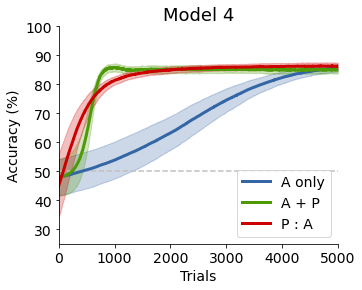

In [47]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
params =     {
    'fontSizeLabels': 14,
    'fontSizeTicks': 14,
    'fontSizePanel': 18,
    'title': 'Model 4',
             }
make_plots(fig, ax, '../sim_data/doublel_svw_fsm.npz', params)

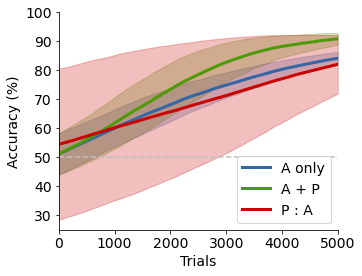

In [45]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
params =     {
    'fontSizeLabels': 14,
    'fontSizeTicks': 14,
    'fontSizePanel': 18,
    'title': None,
             }
make_plots(fig, ax, '../sim_data/onel.npz', params)